## Predict if the person would buy insurance based on age using Logistic Regression
#### Binary Logistic Regression Scenario 

##### Data Ingestion

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv(r"C:\Users\Admin\Documents\DataAnalysis\1py-master\py-master\ML\7_logistic_reg\insurance_data.csv")

In [5]:
df

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


In [11]:
df['bought_insurance'].unique()

array([0, 1], dtype=int64)

##### Data Visualization

In [14]:
import matplotlib.pyplot as plt

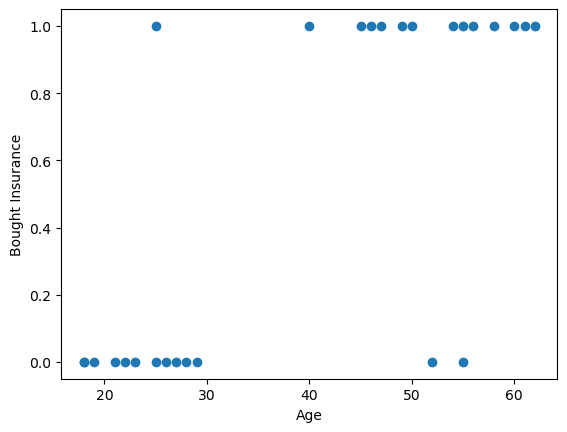

In [18]:
plt.xlabel('Age')
plt.ylabel('Bought Insurance')
plt.scatter(df['age'],df['bought_insurance'])

##### Split the data into training and test set

In [30]:
X = df[['age']]

In [34]:
y = df['bought_insurance']

In [28]:
from sklearn.model_selection import train_test_split

In [93]:
X_train , X_test, y_train, y_test = train_test_split(X,y,train_size=0.7)

In [46]:
len(X_train) == len(y_train)

True

In [48]:
len(X_test) == len(y_test)

True

In [95]:
X_train

,age
6,55
22,40
5,56
17,58
0,22
23,45
21,26
7,60
11,28
16,25


In [97]:
y_train

6     0
22    1
5     1
17    1
0     0
23    1
21    0
7     1
11    0
16    1
1     0
26    0
9     1
12    0
13    0
15    1
2     1
14    1
Name: bought_insurance, dtype: int64

#### Creating a ML model with Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

In [25]:
model = LogisticRegression()    #### You can perform hyperparameter tuning

In [99]:
model.fit(X_train,y_train)

LogisticRegression()

##### Model Predicitons

In [101]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, 1, 1, 1, 1, 0, 0], dtype=int64)

In [103]:
final = pd.concat([X_test,y_test] , axis = 1)

In [105]:
final['Predictions'] = y_pred

In [107]:
final

,age,bought_insurance,Predictions
18,19,0,0
3,52,0,1
10,18,0,0
24,50,1,1
4,46,1,1
25,54,1,1
8,62,1,1
20,21,0,0
19,18,0,0


##### Accuracy of the model

In [109]:
model.score(X_test, y_test)

0.8888888888888888

### Predict for a sample data point wherin the customer age is 45

In [111]:
model.predict([[45]])

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

####  Confusion Matrix

In [114]:
from sklearn.metrics import confusion_matrix

In [118]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[4, 1],
       [0, 4]], dtype=int64)

Text(33.22222222222222, 0.5, 'Truth')

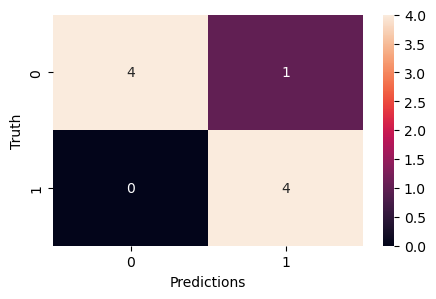

In [124]:
import seaborn as sns
plt.figure(figsize = (5,3))
sns.heatmap(cm, annot=True)
plt.xlabel('Predictions')
plt.ylabel('Truth')